Question 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {'Country' : ['Output_Q', 'Labour_L', 'Capital_K']
       ,'B' :[80, 60, 50]
       ,'C' : [150, 100 ,100]
       ,'D' : [135, 100, 80]
       ,'E' : [165, 120, 100]
       ,'F' : [95, 70, 60]
       ,'G' : [130, 90, 80]
       ,'H' : [110, 80, 70]}
nationaldata = pd.DataFrame(data, columns = [ 'Country', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
nationaldata

,Country,B,C,D,E,F,G,H
0,Output_Q,80,150,135,165,95,130,110
1,Labour_L,60,100,100,120,70,90,80
2,Capital_K,50,100,80,100,60,80,70


Question 2A

In [3]:
mean = nationaldata.mean(axis = 1)
variance = nationaldata.var(axis = 1)
standard_deviation = nationaldata.std(axis = 1)
median = nationaldata.median(axis = 1)

In [4]:
Summary_nationaldata = pd.DataFrame({'Country' : nationaldata['Country'],
                    'Mean' : nationaldata.mean(axis=1),
                    'Variance' : nationaldata.var(axis=1),
                    'Standard Deviation' : nationaldata.std(axis=1),
                    'Median' : nationaldata.median(axis=1)
                   },
                  columns = ['Country','Mean','Variance','Standard Deviation','Median']
                  )
Summary_nationaldata

,Country,Mean,Variance,Standard Deviation,Median
0,Output_Q,123.571429,914.285714,30.237158,130.0
1,Labour_L,88.571429,414.285714,20.354010,90.0
2,Capital_K,77.142857,357.142857,18.898224,80.0


Question 2B

In [5]:
nationaldata_Q = nationaldata[0:1]
nationaldata_Q

,Country,B,C,D,E,F,G,H
0,Output_Q,80,150,135,165,95,130,110


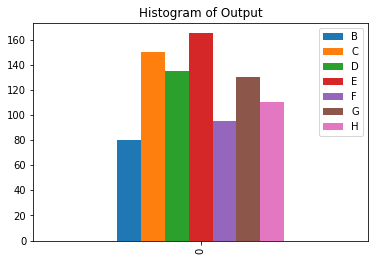

In [6]:
nationaldata_Q.plot(kind = 'bar', style = 'b', title = 'Histogram of Output')

In [7]:
nationaldata_L = nationaldata[1:2]
nationaldata_L

,Country,B,C,D,E,F,G,H
1,Labour_L,60,100,100,120,70,90,80


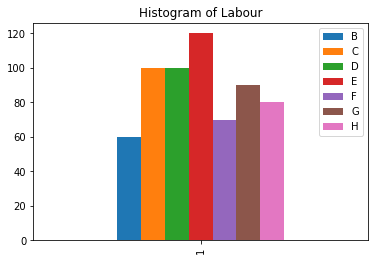

In [8]:
nationaldata_L.plot(kind = 'bar', style = 'b', title = 'Histogram of Labour')

Question 2C

In [9]:
nationaldata_t = nationaldata.transpose()
nationaldata_t

,0,1,2
Country,Output_Q,Labour_L,Capital_K
B,80,60,50
C,150,100,100
D,135,100,80
E,165,120,100
F,95,70,60
G,130,90,80
H,110,80,70


In [10]:
nationaldata_t.columns = nationaldata_t.iloc[0]
nationaldata_t1 = nationaldata_t.reindex(nationaldata_t.index.drop("Country"))
nationaldata_t1

Country,Output_Q,Labour_L,Capital_K
B,80,60,50
C,150,100,100
D,135,100,80
E,165,120,100
F,95,70,60
G,130,90,80
H,110,80,70


In [11]:
nationaldata_t1["Output_Q"] = nationaldata_t1.Output_Q.astype(int)
nationaldata_t1["Labour_L"] = nationaldata_t1.Labour_L.astype(int)
nationaldata_t1["Capital_K"] = nationaldata_t1.Capital_K.astype(int)

In [12]:
nationaldata_log = nationaldata_t1
nationaldata_log['log_Output'] = np.log(nationaldata_log['Output_Q'])
nationaldata_log['log_Labour'] = np.log(nationaldata_log['Labour_L'])
nationaldata_log['log_Capital'] = np.log(nationaldata_log['Capital_K'])
nationaldata_log

Country,Output_Q,Labour_L,Capital_K,log_Output,log_Labour,log_Capital
B,80,60,50,4.382027,4.094345,3.912023
C,150,100,100,5.010635,4.605170,4.605170
D,135,100,80,4.905275,4.605170,4.382027
E,165,120,100,5.105945,4.787492,4.605170
F,95,70,60,4.553877,4.248495,4.094345
G,130,90,80,4.867534,4.499810,4.382027
H,110,80,70,4.700480,4.382027,4.248495


In [13]:
nationaldata_log.drop('Output_Q', axis = 1, inplace = True)
nationaldata_log.drop('Labour_L', axis = 1, inplace = True)
nationaldata_log.drop('Capital_K', axis = 1, inplace = True)
nationaldata_log

Country,log_Output,log_Labour,log_Capital
B,4.382027,4.094345,3.912023
C,5.010635,4.605170,4.605170
D,4.905275,4.605170,4.382027
E,5.105945,4.787492,4.605170
F,4.553877,4.248495,4.094345
G,4.867534,4.499810,4.382027
H,4.700480,4.382027,4.248495


Question 2D

In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept = True)
import statsmodels.api as sm

In [15]:
X = nationaldata_log.iloc[0:7, [1,2]]
X

Country,log_Labour,log_Capital
B,4.094345,3.912023
C,4.605170,4.605170
D,4.605170,4.382027
E,4.787492,4.605170
F,4.248495,4.094345
G,4.499810,4.382027
H,4.382027,4.248495


In [16]:
Y = nationaldata_log.iloc[0:7, [0]]
Y

Country,log_Output
B,4.382027
C,5.010635
D,4.905275
E,5.105945
F,4.553877
G,4.867534
H,4.700480


In [17]:
linreg.fit(X, Y)
print ("Coefficients of log_Labour and log_Capital respectively:", linreg.coef_)
print ("Intercept term:", linreg.intercept_)

Coefficients of log_Labour and log_Capital respectively: [[0.54842747 0.50874094]]
Intercept term: [0.14623321]


In [18]:
X2 = sm.add_constant(X)
estimat = sm.OLS(Y, X2)
estimat2 = estimat.fit()
print (estimat2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Output   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        18:40:50   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1462      0.114      1.282      

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


Question 2E

In [19]:
import seaborn as sns

Text(0, 0.5, '')

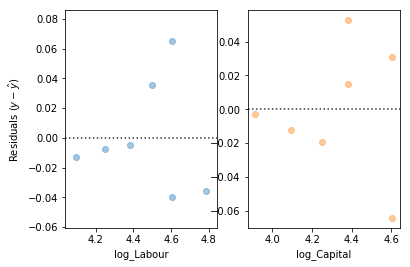

In [20]:
fig, ax= plt.subplots(1, 2)
ax[0] = sns.residplot('log_Labour', 'log_Output', nationaldata_log, ax=ax[0], scatter_kws={'alpha': 0.4})
ax[0].set_ylabel('Residuals $(y-\hat{y})$')
ax[1] = sns.residplot('log_Capital', 'log_Output', nationaldata_log, ax=ax[1], scatter_kws={'alpha': 0.4})
ax[1].set_ylabel('')

Question 2F

In [21]:
print (estimat2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_Output   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        18:40:52   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1462      0.114      1.282      

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
